In [5]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

page =requests.get("https://www.imdb.com/list/ls091520106/")

soup2 =BeautifulSoup(page.content, 'html.parser')

In [45]:
films = soup2.find('div',{'class' : 'lister-list'})

f_links = []
for x in films.find_all('a', href=True):
    f_links.append(x['href'])

f_linksC = []
for i in range(1, len(f_links) - 1):
    if f_links[i] != '#void':
            if f_links[i] != f_links[i + 1]:
                if f_links[i][1] != 'n':
                    f_linksC.append(f_links[i])

filmingDates = []

loc = '/locations?ref_=tt_dt_dt'

for i in range(100):
    locUrl = 'https://www.imdb.com/' + f_linksC[i][1:-1] + loc
    locPage = requests.get(locUrl)
    locSoup = BeautifulSoup(locPage.content, 'html.parser')
    fd = locSoup.find('li', {'class':"ipl-zebra-list__item"})
    if fd:
        filmingDates.append(fd.text.strip())
    else:
        filmingDates.append('Not given.')

In [44]:
titles = []
descriptions = []
releases = []
directors = []
ratings = []
durations = []
genres = []
stars = []


for i in range(1, 201, 2):
    child = list(films.children)[i]
    filmString = child.text.replace('\n', "")
    #. \ + * ? [ ^ ] $ ( ) { } = !  | : -  
    flist = re.split("\||  ", filmString)
    fset = [x for x in flist if x != '']
    if 'Metascore' in fset:
        fset.remove('Metascore')
    if len(fset) > 1:
        t = fset[0]
        t = t[t.find('.') + 1:]
        rel = t[::-1][t[::-1].find(')') + 1:][:4][::-1]
        t = t[:t.find('(')]
        releases.append(int(rel))
        titles.append(t)
        durations.append(int(fset[1][:fset[1].find(' ')]))
        genres.append(fset[2])
            
        r = fset[3][:5]
        for l in r:
            if l.isalpha():
                r = r.replace(l,"")

        ratings.append(float(r))
        descriptions.append(fset[4])
        directors.append(fset[5][9:])
        s = fset[6][7:]
        s = s[::-1]
        s = s[s.find('V') + 1:]
        stars.append(s[::-1])

top_100 = {'title' : titles, 'description' : descriptions, 'release' : releases, 'director' :  directors, 'rating' : ratings, 'duration' : durations, 'genre' : genres, 'stars' : stars, 'filming dates' : filmingDates}




In [46]:
movies = pd.DataFrame(top_100)
movies.head()

,title,description,release,director,rating,duration,genre,stars,filming dates
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",16 June 1993 - 10 September 1993
1,The Godfather,The aging patriarch of an organized crime dyna...,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Ke...",29 March 1971 - 6 August 1971
2,The Godfather: Part II,The early life and career of Vito Corleone in ...,1974,Francis Ford Coppola,90.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Dian...",1 October 1973 - 19 June 1974
3,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,Christopher Nolan,90.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M...",18 April 2007 - 11 November 2007
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,1957,Sidney Lumet,90.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",June 1956 - July 1956


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [55]:
movies.loc[2,'rating']=9.0
movies.loc[3,'rating']=9.0
movies.loc[4,'rating']=9.0
movies.head()

,title,description,release,director,rating,duration,genre,stars,filming dates
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",16 June 1993 - 10 September 1993
1,The Godfather,The aging patriarch of an organized crime dyna...,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Ke...",29 March 1971 - 6 August 1971
2,The Godfather: Part II,The early life and career of Vito Corleone in ...,1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Dian...",1 October 1973 - 19 June 1974
3,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M...",18 April 2007 - 11 November 2007
4,12 Angry Men,A jury holdout attempts to prevent a miscarria...,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",June 1956 - July 1956


[]

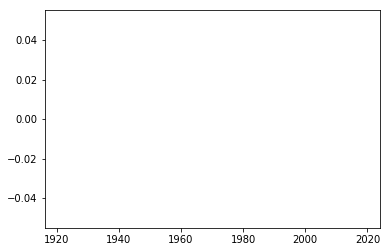

In [56]:
plt.hist(movies['rating'], range = (min(movies['release']), max(movies['release'])))
plt.plot()

        

In [73]:
norm_rating =[]
ratng = movies['rating'].tolist() #list of movies' rating
for temp in ratng:
    norm_rating.append((temp-min(ratng))/(max(ratng)-min(ratng)))
    
norm_duration =[]
ratng = movies['duration'].tolist() #list of movies' rating
for temp in ratng:
    norm_duration.append((temp-min(ratng))/(max(ratng)-min(ratng)))

In [74]:
norm_duration

[0.45962732919254656,
 0.6645962732919255,
 0.8322981366459627,
 0.5217391304347826,
 0.17391304347826086,
 0.7888198757763976,
 0.8260869565217391,
 0.5341614906832298,
 0.4968944099378882,
 0.4409937888198758,
 0.33540372670807456,
 0.6832298136645962,
 0.45962732919254656,
 0.4968944099378882,
 0.34782608695652173,
 0.6894409937888198,
 0.422360248447205,
 0.40372670807453415,
 0.484472049689441,
 0.8633540372670807,
 0.36645962732919257,
 0.38509316770186336,
 0.2981366459627329,
 0.3105590062111801,
 0.32919254658385094,
 0.38509316770186336,
 0.6273291925465838,
 0.35403726708074534,
 0.7515527950310559,
 0.2608695652173913,
 0.40372670807453415,
 0.6273291925465838,
 0.2360248447204969,
 0.12422360248447205,
 0.3167701863354037,
 0.2981366459627329,
 0.5093167701863354,
 0.11801242236024845,
 0.42857142857142855,
 0.2732919254658385,
 0.2546583850931677,
 0.5403726708074534,
 0.11801242236024845,
 0.515527950310559,
 0.2360248447204969,
 0.6024844720496895,
 0.38509316770186336,